# Part B - Predictive Modelling

## Question 1 Feature Engineering

In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load the data
df = pd.read_csv('C:/Users/lixu/Desktop/u3251456_CHEN_assignment1/zomato_df_final_data.csv')
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


### Exploratory Data Analysis

In [6]:
# Basic information about dataset
df = pd.read_csv('C:/Users/lixu/Desktop/u3251456_CHEN_assignment1/zomato_df_final_data.csv')
df.head()

# Data shape
print(df.shape)

# Print column names
print(df.columns)

# Summary of dataset
print(df.info())

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float6

Since 'address',' lat', and 'lng' can be represented by subzone, therefore, for analysis, I will only focus on subzone. In addition, 'link', 'phone', 'title', 'color', 'cuisine_color' are irrelevant to the subsequent analysis, so they will also be excluded.

In [8]:
# Remove unnecessary columns for building models preparation
df.drop(['address','lat','link','lng','phone','title','color','cuisine_color'],axis = 1, inplace = True)
df.head()

,cost,cuisine,rating_number,rating_text,subzone,type,votes,groupon,cost_2
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,['Casual Dining'],1311.0,False,5.243902
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",['Café'],3236.0,False,7.560976
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",['Fine Dining'],1227.0,False,10.650407
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,"['Fine Dining', 'Bar']",278.0,False,22.235772
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,['Casual Dining'],2150.0,False,5.630081


In [9]:
# Find categorical variables
categorical_columns = [var for var in df.columns if df[var].dtype in ['O','bool']]

# Print results
print("There are {} categorical variables\n".format(len(categorical_columns)))
print("The categorical variables are: ", categorical_columns)

There are 5 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'type', 'groupon']


In [10]:
# Find numerical variables
numerical_columns = [var for var in df.columns if df[var].dtypes not in ['O','bool']]

# Print results
print('There are {} numerical variables\n'.format(len(numerical_columns)))
print('The numerical variables are :', numerical_columns)

There are 4 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'cost_2']


In [11]:
# Check the missing values
print(df.isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * df.isnull().sum() / df.shape[0])

cost              346
cuisine             0
rating_number    3316
rating_text      3316
subzone             0
type               48
votes            3316
groupon             0
cost_2            346
dtype: int64
********
Percentages of missing values
********
cost              3.295238
cuisine           0.000000
rating_number    31.580952
rating_text      31.580952
subzone           0.000000
type              0.457143
votes            31.580952
groupon           0.000000
cost_2            3.295238
dtype: float64


### Explore Categorical Variables

In [13]:
# Explore categorical variables
df[categorical_columns].head()

,cuisine,rating_text,subzone,type,groupon
0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",Very Good,CBD,['Casual Dining'],False
1,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",Excellent,"The Grounds of Alexandria, Alexandria",['Café'],False
2,['Japanese'],Excellent,"The Star, Pyrmont",['Fine Dining'],False
3,['Modern Australian'],Excellent,Circular Quay,"['Fine Dining', 'Bar']",False
4,"['Thai', 'Salad']",Excellent,Chinatown,['Casual Dining'],False


In [14]:
# Check the missing values
print(df[categorical_columns].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * df[categorical_columns].isnull().sum() / df.shape[0])

cuisine           0
rating_text    3316
subzone           0
type             48
groupon           0
dtype: int64
********
Percentages of missing values
********
cuisine         0.000000
rating_text    31.580952
subzone         0.000000
type            0.457143
groupon         0.000000
dtype: float64


In [15]:
# Get the frequency counts 
for var in categorical_columns:
    print(df[var].value_counts())

cuisine
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']                1
['Pub Food', 'Burger', 'Pizza']               1
['Cambodian', 'Vietnamese']                   1
['Kebab', 'Burger', 'Fish and Chips']         1
Name: count, Length: 1759, dtype: int64
rating_text
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: count, dtype: int64
subzone
CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 


In [16]:
# Get the percentages
for var in categorical_columns:
    print(df[var].value_counts() / df.shape[0])

cuisine
['Cafe']                                   0.166190
['Thai']                                   0.051619
['Chinese']                                0.042857
['Modern Australian']                      0.032952
['Indian']                                 0.027238
                                             ...   
['Cafe', 'Spanish', 'Italian', 'Tapas']    0.000095
['Desserts', 'Steak', 'Tapas']             0.000095
['Pub Food', 'Burger', 'Pizza']            0.000095
['Cambodian', 'Vietnamese']                0.000095
['Kebab', 'Burger', 'Fish and Chips']      0.000095
Name: count, Length: 1759, dtype: float64
rating_text
Average      0.428667
Good         0.182571
Very Good    0.048190
Poor         0.019905
Excellent    0.004857
Name: count, dtype: float64
subzone
CBD                                         0.045333
Surry Hills                                 0.024762
Parramatta                                  0.021429
Darlinghurst                                0.017905
Chinatow

In [17]:
# A function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [18]:
explore_categorical(df, 'cuisine')

********** missing values **********
0
********** Labels **********
["['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"
 "['Cafe', 'Coffee and Tea', 'Salad', 'Poké']" "['Japanese']" ...
 "['Bakery', 'Pizza', 'Kebab']" "['Cafe', 'Coffee and Tea', 'Chinese']"
 "['Kebab', 'Burger', 'Fish and Chips']"]
********** frequency **********
cuisine
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']                1
['Pub Food', 'Burger', 'Pizza']               1
['Cambodian', 'Vietnamese']                   1
['Kebab', 'Burger', 'Fish and Chips']         1
Name: count, Length: 1759, dtype: int64


In [19]:
explore_categorical(df, 'rating_text')

********** missing values **********
3316
********** Labels **********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor' nan]
********** frequency **********
rating_text
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: count, dtype: int64


In [20]:
explore_categorical(df, 'subzone')

********** missing values **********
0
********** Labels **********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'E

In [21]:
explore_categorical(df, 'type')

********** missing values **********
48
********** Labels **********
["['Casual Dining']" "['Café']" "['Fine Dining']" "['Fine Dining', 'Bar']"
 "['Casual Dining', 'Dessert Parlour']" "['Fine Dining', 'Wine Bar']"
 "['Casual Dining', 'Wine Bar']" "['Casual Dining', 'Bar']"
 "['Fast Food']" "['Café', 'Bakery']" "['Casual Dining', 'Café']"
 "['Bar']" "['Bakery', 'Dessert Parlour']" "['Bar', 'Wine Bar']"
 "['Food Court']" "['Dessert Parlour', 'Café']" "['Bar', 'Casual Dining']"
 "['Bakery', 'Pub']" "['Café', 'Casual Dining']" "['Café', 'Bar']"
 "['Casual Dining', 'Pub']" "['Bakery', 'Café']" "['Food Truck']"
 "['Café', 'Dessert Parlour']" "['Dessert Parlour']" "['Pub']" nan
 "['Pub', 'Casual Dining']" "['Dessert Parlour', 'Bakery']"
 "['Café', 'Wine Bar']" "['Pub', 'Wine Bar']"
 "['Food Court', 'Casual Dining']" "['Wine Bar', 'Casual Dining']"
 "['Casual Dining', 'Food Court']" "['Club', 'Bar']"
 "['Casual Dining', 'Bakery']" "['Bar', 'Pub']" "['Bar', 'Café']"
 "['Pub', 'Bar']" "['Beverag

In [22]:
explore_categorical(df, 'groupon')

********** missing values **********
0
********** Labels **********
[False  True]
********** frequency **********
groupon
False    10378
True       122
Name: count, dtype: int64


### Explore Numerical Variables

In [24]:
# Find numerical variables
numerical_columns = [var for var in df.columns if df[var].dtypes not in ['O','bool']]

# Print results
print('There are {} numerical variables\n'.format(len(numerical_columns)))
print('The numerical variables are :', numerical_columns)

There are 4 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'cost_2']


In [25]:
# Check missing values in numerical variables
df[numerical_columns].isnull().sum()

cost              346
rating_number    3316
votes            3316
cost_2            346
dtype: int64

In [26]:
# View summary statistics in numerical variables
print(round(df[numerical_columns].describe()), 2)

          cost  rating_number   votes   cost_2
count  10154.0         7184.0  7184.0  10154.0
mean      51.0            3.0    84.0      5.0
std       28.0            0.0   175.0      2.0
min        8.0            2.0     4.0      2.0
25%       30.0            3.0    12.0      4.0
50%       45.0            3.0    32.0      5.0
75%       60.0            4.0    87.0      6.0
max      500.0            5.0  3236.0     40.0 2


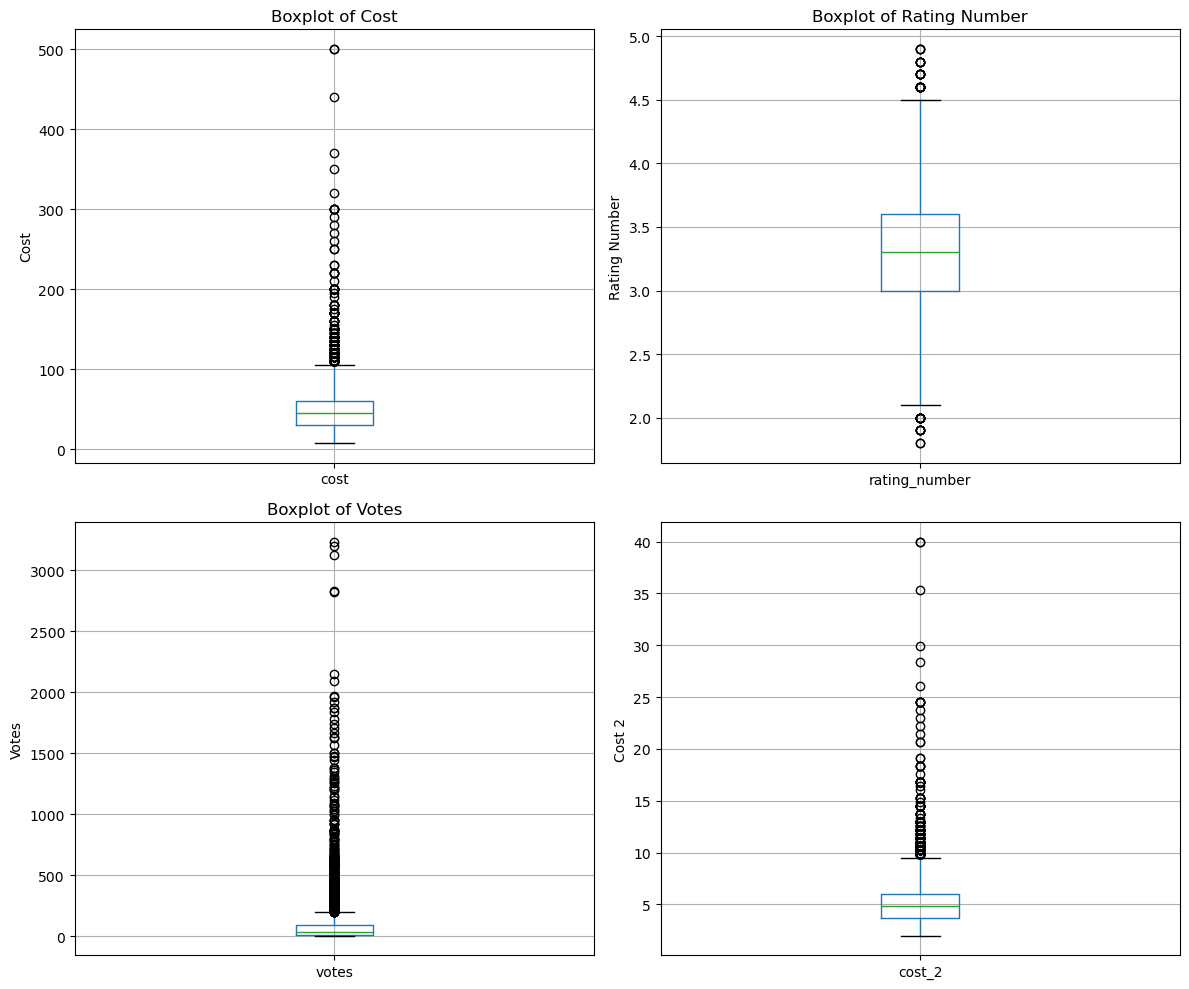

In [27]:
# Use boxplots to visualise outliers in these variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

df.boxplot(column='cost', ax=axes[0, 0])  
axes[0, 0].set_title('Boxplot of Cost')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Cost')

df.boxplot(column='rating_number', ax=axes[0, 1])  
axes[0, 1].set_title('Boxplot of Rating Number')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Rating Number')

df.boxplot(column='votes', ax=axes[1, 0])  
axes[1, 0].set_title('Boxplot of Votes')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Votes')

df.boxplot(column='cost_2', ax=axes[1, 1])  
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Cost 2')

# Print the plot
plt.tight_layout()
plt.show()

In [28]:
# Find aoutliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [29]:
_,_,_ = find_outliers('cost')

cost outliers are values < -60.0 or > 150.0


In [30]:
_,_,_ = find_outliers('votes')

votes outliers are values < -213.0 or > 312.0


In [31]:
_,_,_ = find_outliers('rating_number')

rating_number outliers are values < 1.1999999999999997 or > 5.4


In [32]:
_,_,_ = find_outliers('cost_2')

cost_2 outliers are values < -3.252032521 or > 12.967479676


### Declare source and target variables

In [34]:
X = df.drop(['rating_number'], axis=1)
y = df['rating_number']

### Feature engineering

In [36]:
# Display categorical variables
categorical_columns = [var for var in df.columns if df[var].dtype in ['O','bool']]
categorical_columns

['cuisine', 'rating_text', 'subzone', 'type', 'groupon']

In [37]:
# Display numerical variables
numerical_columns = [var for var in df.columns if df[var].dtype not in ['O','bool']]
numerical_columns

['cost', 'rating_number', 'votes', 'cost_2']

### Engineering missing values in numerical variables

In [39]:
# Display missing values
df[numerical_columns].isnull().sum()

cost              346
rating_number    3316
votes            3316
cost_2            346
dtype: int64

In [40]:
# Do the same for the text data
round(df[numerical_columns].isnull().mean(), 2)

cost             0.03
rating_number    0.32
votes            0.32
cost_2           0.03
dtype: float64

In [41]:
# Percentage of missing values in each variable
round(df[numerical_columns].isnull().mean(), 2)

cost             0.03
rating_number    0.32
votes            0.32
cost_2           0.03
dtype: float64

In [42]:
# Filling missing values with medians of the numerical columns
for df_temp in [df]:
    for col in numerical_columns:
        col_median = df[col].median()  
        df_temp[col] = df_temp[col].fillna(col_median)

In [43]:
# Check again missing values in numerical variables
df[numerical_columns].isnull().sum()

cost             0
rating_number    0
votes            0
cost_2           0
dtype: int64

### Engineering missing values in categorical variables

In [45]:
round(df[categorical_columns].isnull().mean(), 2)

cuisine        0.00
rating_text    0.32
subzone        0.00
type           0.00
groupon        0.00
dtype: float64

In [46]:
# Filling missing values with the most frequent value of the categorical columns
for df_temp in [df]:
    for col in categorical_columns:
        col_mode = df[col].mode()[0]  
        df_temp[col] = df_temp[col].fillna(col_mode)

In [47]:
# Check missing values in categorical variables in X_train
df[categorical_columns].isnull().sum()

cuisine        0
rating_text    0
subzone        0
type           0
groupon        0
dtype: int64

### Engineering outliers in numerical variables

In [49]:
# Replace the outliers with some predefined maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 150, 
                      'votes': 312, 
                      'cost_2': 13.0, 
                     }
for df_temp in [df]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])

In [50]:
df.cost.max(), df.cost.max()

(150.0, 150.0)

In [51]:
df.votes.max(), df.votes.max()

(312.0, 312.0)

In [52]:
df.cost_2.max(), df.cost_2.max()

(13.0, 13.0)

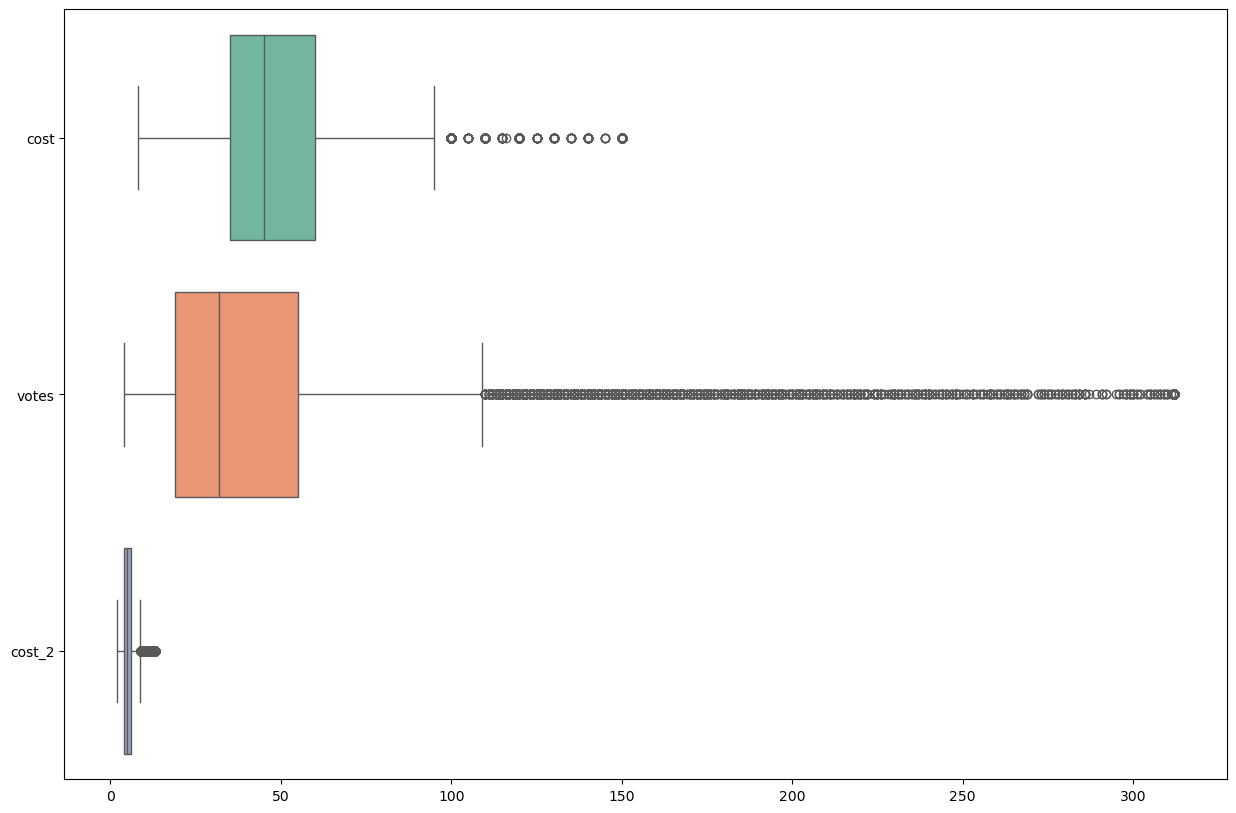

In [53]:
# Use Seaborn Library to plot elegant ones
df_custom = df[['cost', 'votes', 'cost_2']]
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

### Engineering outliers in categorical variables

In [55]:
# Check outliers for categorical variables
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(normalize=True)) 
    print("\n")

# Set a threshold
threshold = 0.01  

# Find outliers
for column in categorical_columns:
    # Calculate frequency of each column
    value_counts = df[column].value_counts(normalize=True)  
    # Find outliers
    rare_categories = value_counts[value_counts < threshold].index  
    # Calculate percentage of outline
    rare_percentage = value_counts[value_counts < threshold].sum() * 100 
    # Print the result
    print(f"Percentage of rare categories in {column}: {rare_percentage:.2f}%\n")

Value counts for cuisine:
cuisine
['Cafe']                                   0.166190
['Thai']                                   0.051619
['Chinese']                                0.042857
['Modern Australian']                      0.032952
['Indian']                                 0.027238
                                             ...   
['Cafe', 'Spanish', 'Italian', 'Tapas']    0.000095
['Desserts', 'Steak', 'Tapas']             0.000095
['Pub Food', 'Burger', 'Pizza']            0.000095
['Cambodian', 'Vietnamese']                0.000095
['Kebab', 'Burger', 'Fish and Chips']      0.000095
Name: proportion, Length: 1759, dtype: float64


Value counts for rating_text:
rating_text
Average      0.744476
Good         0.182571
Very Good    0.048190
Poor         0.019905
Excellent    0.004857
Name: proportion, dtype: float64


Value counts for subzone:
subzone
CBD                                         0.045333
Surry Hills                                 0.024762
Parramatta        

Based on the results above, the outliers in the categorical columns are either too high or too low in proportion. If the high-proportion categories are classified as "other," it may significantly impact the modelling results. On the other hand, the low-proportion categories have limited sample sizes and are unlikely to influence the model. Therefore, I choose to ignore these outliers and not handle them separately.

In [57]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for 'rating_text'
label_encoder = LabelEncoder()
df['rating_text_encoded'] = label_encoder.fit_transform(df['rating_text'])
print(df['rating_text_encoded'])

df['subzone_encoded'] = label_encoder.fit_transform(df['subzone'])
print(df['subzone_encoded'])

0        4
1        1
2        1
3        1
4        1
        ..
10495    0
10496    0
10497    0
10498    0
10499    0
Name: rating_text_encoded, Length: 10500, dtype: int32
0         61
1        496
2        513
3        105
4        100
        ... 
10495    371
10496    250
10497    377
10498    453
10499    344
Name: subzone_encoded, Length: 10500, dtype: int32


## Question 2 Regression

In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [60]:
print(df.columns)

Index(['cost', 'cuisine', 'rating_number', 'rating_text', 'subzone', 'type',
       'votes', 'groupon', 'cost_2', 'rating_text_encoded', 'subzone_encoded'],
      dtype='object')


In [61]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df[['cost', 'votes', 'rating_text_encoded', 'subzone_encoded']]
y = df['rating_number']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regression model 1

In [63]:
# Linear regression model 1
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

# Predict the test set
y_pred_1 = model_regression_1.predict(X_test)

# Calculate MSE
mse_1 = mean_squared_error(y_test, y_pred_1)
print(f'Mean Squared Error for model_regression_1: {mse_1}')

Mean Squared Error for model_regression_1: 0.06446406337629314


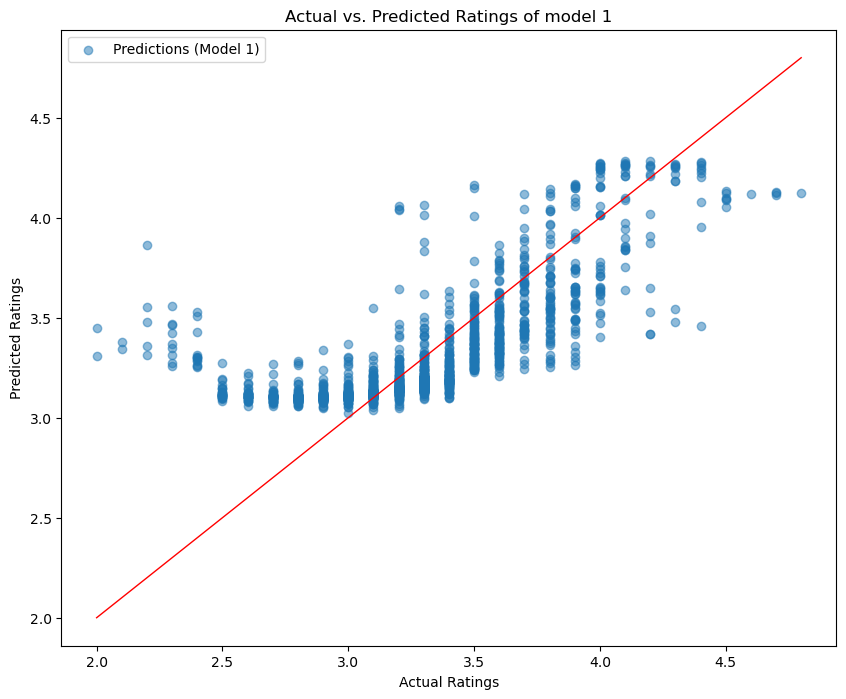

In [64]:
# Visulization
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_1, alpha=0.5, label="Predictions (Model 1)")
plt.xlabel("Actual Ratings")  
plt.ylabel("Predicted Ratings") 
plt.title("Actual vs. Predicted Ratings of model 1")  

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=1)

# Print the plot
plt.legend()
plt.show()


### Linear regression model 2

In [66]:
# Standardize the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build linear regression model 2 using Gradient Descent
model_regression_2 = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01)
model_regression_2.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_2 = model_regression_2.predict(X_test_scaled)

# Calculate MSE
mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"Mean Squared Error for model_regression_2 after scaling: {mse_2}")

Mean Squared Error for model_regression_2 after scaling: 0.06438221890415394


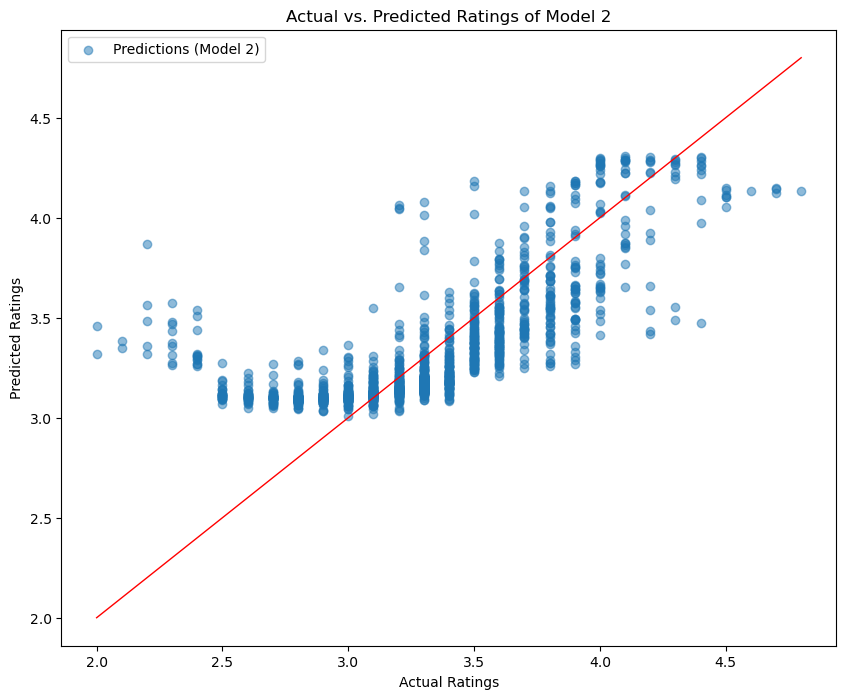

In [67]:
# Visulization
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_2, alpha=0.5, label="Predictions (Model 2)")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings of Model 2")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=1)

# Print the plot
plt.legend()
plt.show()

### Question 3 Classification

In [69]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
# Simplify the problem into binary classifications
df['binary_rating'] = df['rating_text'].apply(lambda x: 1 if x in ['Poor', 'Average'] else 2)

# Define the features (X) and target (y)
X = df[['cost', 'votes', 'cost_2', 'rating_text_encoded', 'subzone_encoded']]
y = df['binary_rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build a logistic regression model 3
model_classification_3 = LogisticRegression(max_iter=1000)
model_classification_3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_classification_3.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[1594   37]
 [   1  468]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      1631
           2       0.93      1.00      0.96       469

    accuracy                           0.98      2100
   macro avg       0.96      0.99      0.97      2100
weighted avg       0.98      0.98      0.98      2100



### Conclusion

Based on the confusion matrix, this model made only 37 classification errors when predicting class 1, which means that although the model correctly identified most of the low-rated restaurants, 37 samples were still misclassified. However, when predicting class 2, no classification errors occurred. The model's average accuracy is 98%. This indicates that this logistic regression model is highly effective in classification and prediction, especially distinguishing high-rated restaurants.